### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [782]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re as re

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [783]:
data = pd.read_csv('../data/coupons.csv')

In [784]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [785]:
# Duplicate rows check
# Check for duplicate rows
duplicates = data.duplicated().sum()

print(f"Number of duplicate rows: {duplicates}")

# Display duplicate rows if any
if duplicates > 0:
    print("Duplicate rows:")
    print(data[data.duplicated()])
else:
    print("No duplicate rows found.")

Number of duplicate rows: 74
Duplicate rows:
     destination passanger weather  temperature  time                 coupon  \
4192        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4236        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4280        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4324        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4409        Work     Alone   Sunny           80   7AM  Carry out & Take away   
...          ...       ...     ...          ...   ...                    ...   
8511        Home     Alone   Sunny           80   6PM                    Bar   
8512        Home   Partner   Sunny           30  10PM  Carry out & Take away   
8513        Work     Alone   Rainy           55   7AM        Restaurant(<20)   
8515        Work     Alone   Snowy           30   7AM      Restaurant(20-50)   
8516        Work     Alone   Sunny           80   7AM        Restaurant(<20

In [786]:
# Missing values check
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [787]:
# Remove duplicates records from the dataset
data = data.drop_duplicates()

# Duplicate rows check
# Check for duplicate rows
duplicates = data.duplicated().sum()

print(f"Number of duplicate rows: {duplicates}")

# Display duplicate rows if any
if duplicates > 0:
    print("Duplicate rows:")
    print(data[data.duplicated()])
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


In [788]:
# save the non-duplicate data to a new csv file
data.to_csv('../data/coupon_dataset_no_duplicates.csv', index=False)

In [789]:
# Missing values check - string columns - will replace with 'unknown'
# replace textual columns with null with 'UNKNOWN'
text_data = data.select_dtypes(include=['object'])

# Fill NaN values with 'UNKNOWN'
text_data_cleaned = text_data.fillna('unknown')

# Update the original DataFrame
data[text_data_cleaned.columns] = text_data_cleaned


In [790]:
# Missing values check
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [791]:
# Assuming 'Y' is the column that indicates whether the coupon was accepted or not
# Renaming it for better readability
data.rename(columns={'Y': 'coupon_accepted'}, inplace=True)

In [792]:
# save non-duplicate and missing data to a new csv file
data.to_csv('../data/coupon_dataset_no_duplicates_no_missing.csv', index=False)

In [793]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   12610 non-null  object
 15  Bar                   12610 non-null  obj

In [794]:
# covariance matrix on numeric columns
numeric_data = data.select_dtypes(include=['number', 'float'])
numeric_data.cov()


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_accepted
temperature,366.852199,-0.175502,0.0,-1.493656,-1.393448,0.771641,-0.771641,0.563590
has_children,-0.175502,0.242711,0.0,0.019427,-0.001700,-0.006554,0.006554,-0.010997
toCoupon_GEQ5min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
toCoupon_GEQ15min,-1.493656,0.019427,0.0,0.246444,0.051076,-0.061664,0.061664,-0.020338
toCoupon_GEQ25min,-1.393448,-0.001700,0.0,0.051076,0.102567,-0.025009,0.025009,-0.017158
direction_same,0.771641,-0.006554,0.0,-0.061664,-0.025009,0.169098,-0.169098,0.003042
direction_opp,-0.771641,0.006554,0.0,0.061664,0.025009,-0.169098,0.169098,-0.003042
coupon_accepted,0.563590,-0.010997,0.0,-0.020338,-0.017158,0.003042,-0.003042,0.245454


In [795]:
# correlation matrix on numeric columns
correlation_matrix = numeric_data.corr()

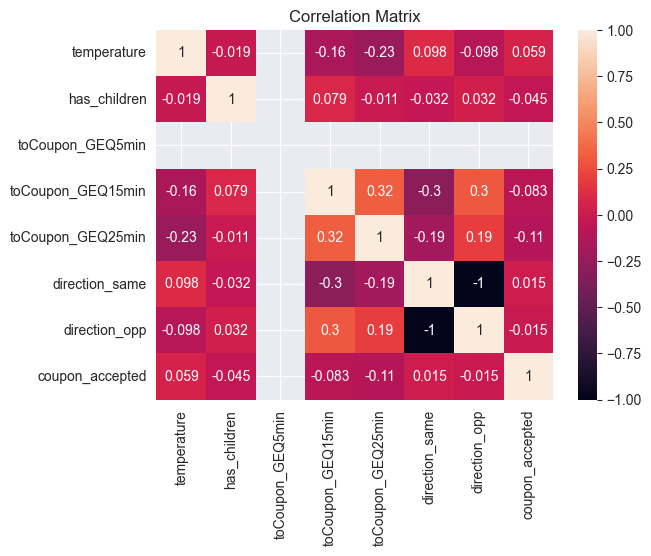

In [796]:
# plot the heat map
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()


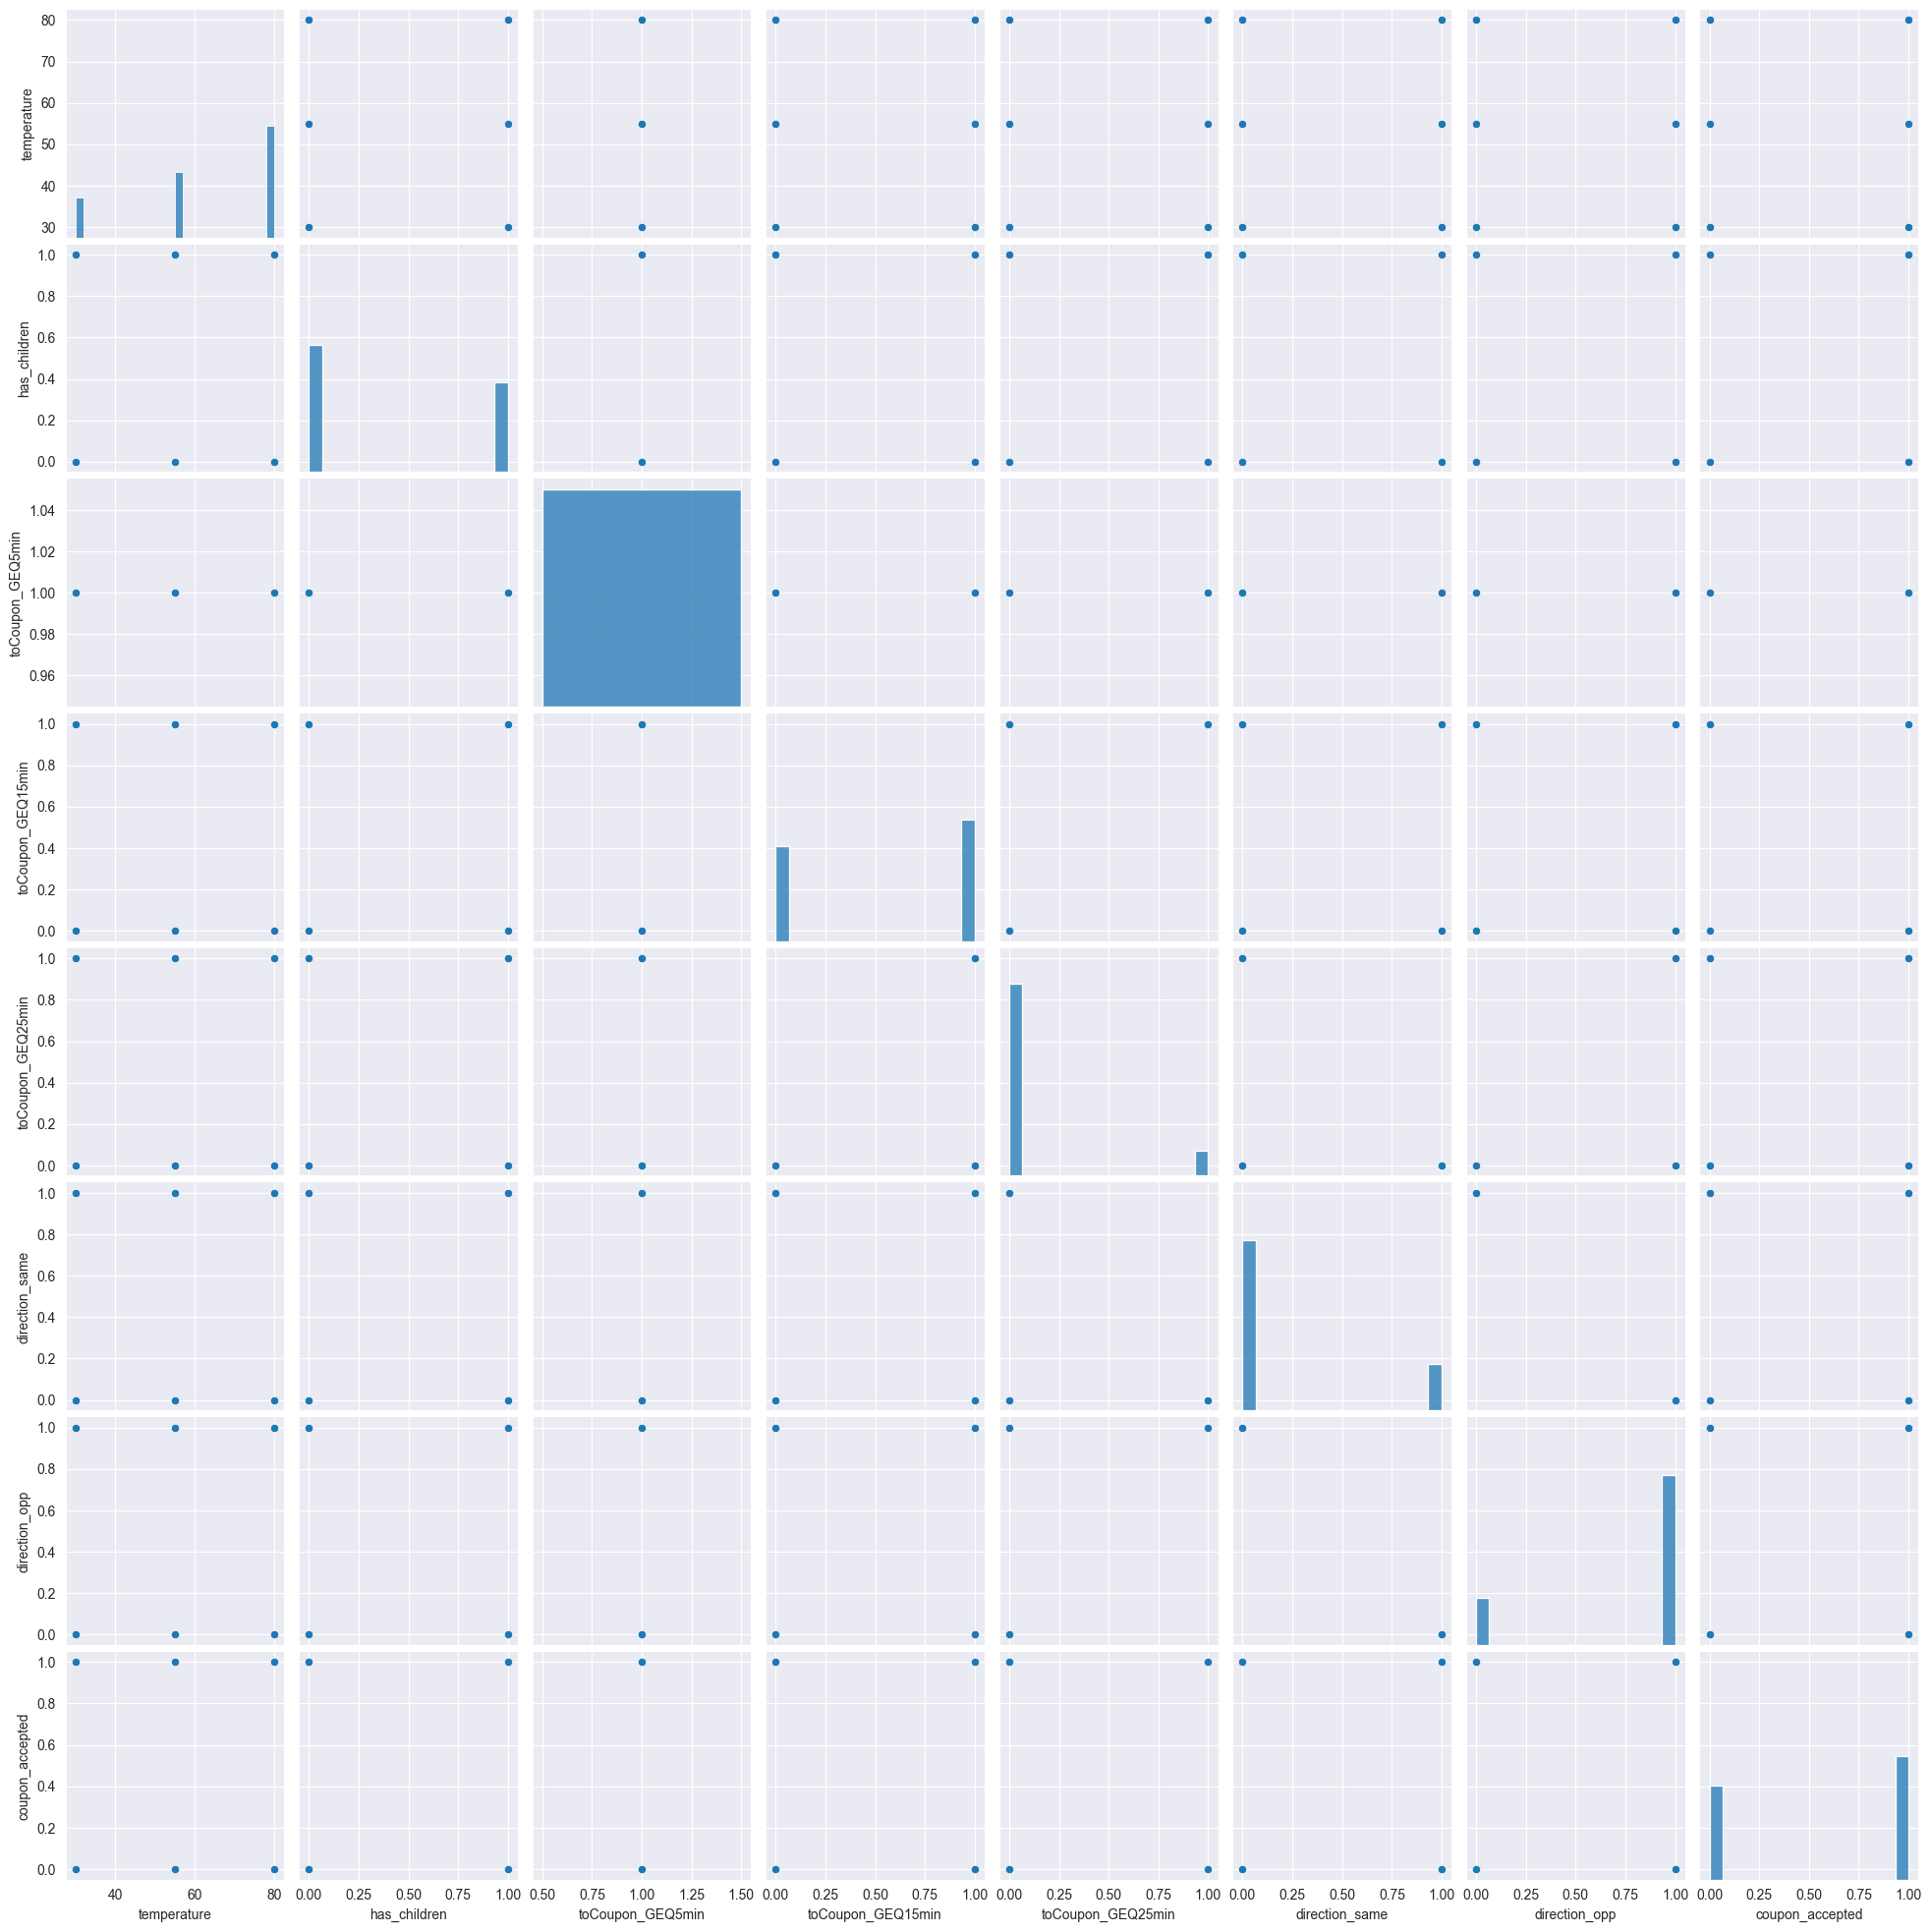

In [797]:
# check pair plot with all numeric columns
sns.pairplot(numeric_data)

4. What proportion of the total observations chose to accept the coupon?



In [798]:
# assuming 'Y' is the column that indicates whether the coupon was accepted(1) or not(0
accepted_coupon_count = data['coupon_accepted'].sum()
print(f"Accepted coupon count: {accepted_coupon_count}")
total_count = data['coupon_accepted'].count()
print(f"Total count: {total_count}")
proportion_accepted = accepted_coupon_count / total_count
print(f"Proportion of accepted coupons: {proportion_accepted:.2%}")


Accepted coupon count: 7157
Total count: 12610
Proportion of accepted coupons: 56.76%


5. Use a bar plot to visualize the `coupon` column.

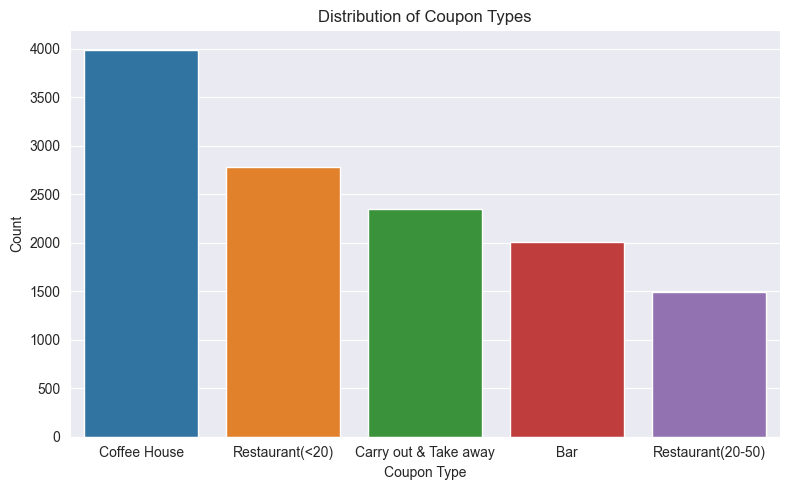

In [799]:
# Count the occurrences of each coupon type
coupon_counts = data['coupon'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=coupon_counts.index, y=coupon_counts.values, hue=coupon_counts.index)
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.title('Distribution of Coupon Types')
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

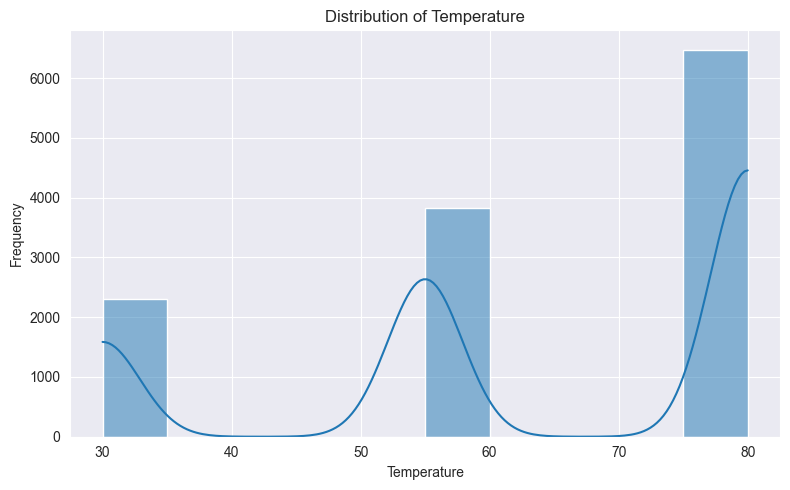

In [800]:
plt.figure(figsize=(8, 5))
sns.histplot(data['temperature'], bins=10, kde=True)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.tight_layout()
plt.show()

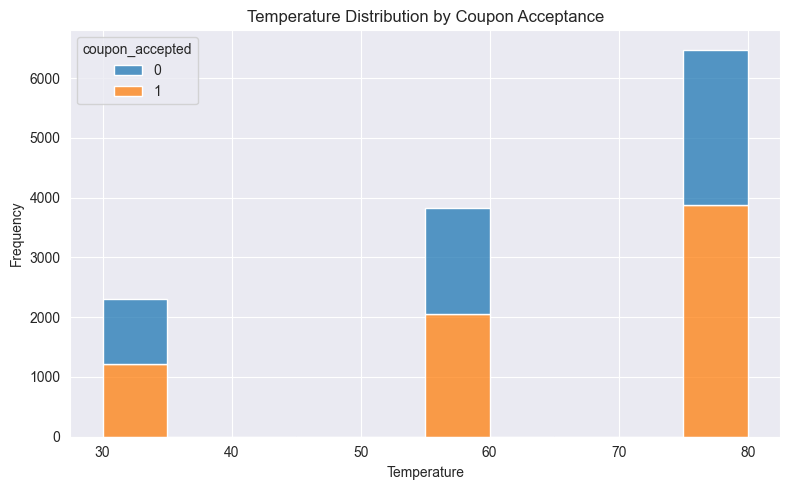

In [801]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='temperature', hue='coupon_accepted', multiple='stack', bins=10)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution by Coupon Acceptance')
plt.tight_layout()
plt.show()

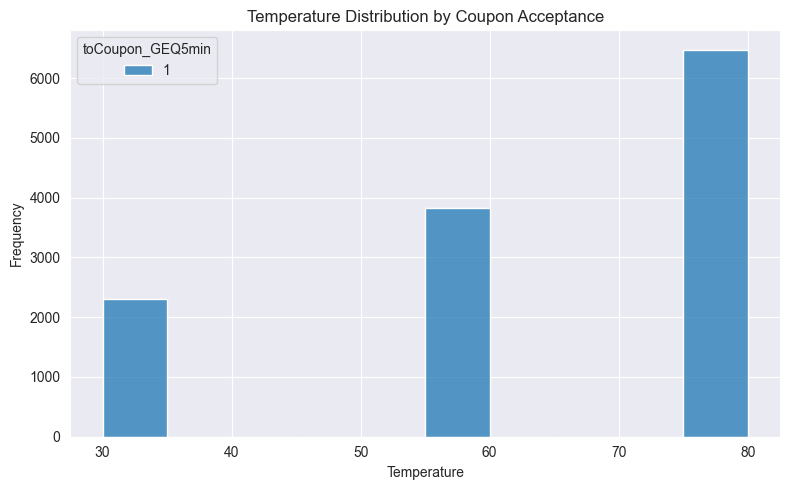

In [802]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='temperature', hue='toCoupon_GEQ5min', multiple='stack', bins=10)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution by Coupon Acceptance')
plt.tight_layout()
plt.show()

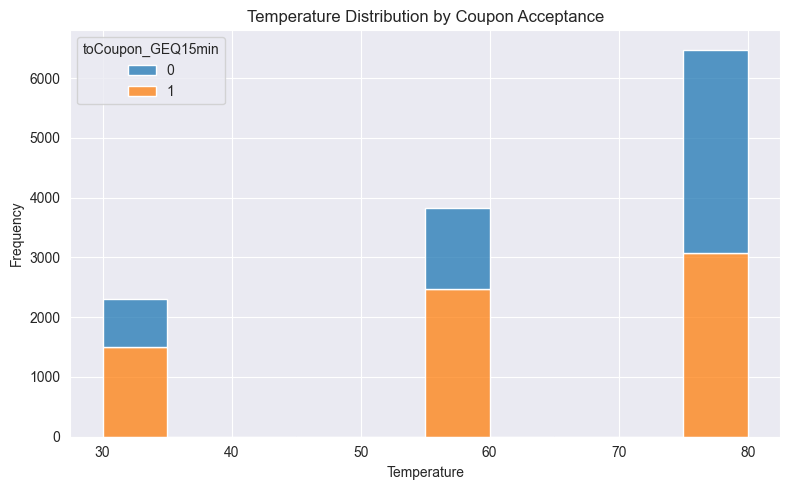

In [803]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='temperature', hue='toCoupon_GEQ15min', multiple='stack', bins=10)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution by Coupon Acceptance')
plt.tight_layout()
plt.show()

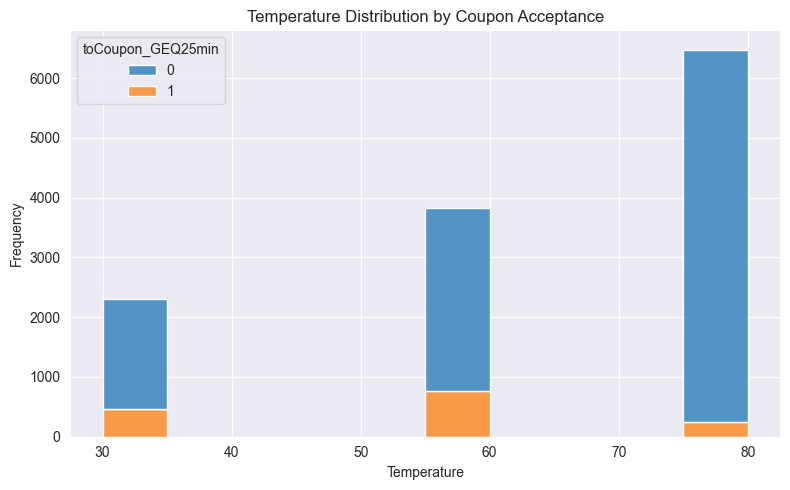

In [804]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='temperature', hue='toCoupon_GEQ25min', multiple='stack', bins=10)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution by Coupon Acceptance')
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [805]:
bar_coupons = data[data['coupon'] == 'Bar'].copy()

bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_accepted
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,unknown,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [806]:
# Calculate the proportion accepted
proportion_accepted = bar_coupons['coupon_accepted'].mean()
print(f"Proportion of bar coupons accepted: {proportion_accepted:.2%}")

Proportion of bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [807]:
# Check unique values in the Bar column
print(bar_coupons['Bar'].unique())

# Update groupings to match actual values
fewer_group = ['never', 'less1', '1~3']
more_group = ['4~8', 'gt8']

# Assign group labels
bar_coupons.loc[:, 'bar_visit_group'] = (
    np.where(bar_coupons['Bar'].isin(fewer_group), 'few',
    np.where(bar_coupons['Bar'].isin(more_group), 'more', 'unknown')
))
# for null values we assigned 'unknown' when we data cleaned initially

print(bar_coupons['bar_visit_group'].unique())

# Calculate acceptance rates
acceptance_rates = bar_coupons.groupby('bar_visit_group')['coupon_accepted'].mean()
print(acceptance_rates)


['never' 'less1' '1~3' 'gt8' 'unknown' '4~8']
['few' 'more' 'unknown']
bar_visit_group
few        0.370391
more       0.768844
unknown    0.380952
Name: coupon_accepted, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [808]:
# we have textual values in the age column so we need to convert them to numeric values
def age_to_num(age):
    if isinstance(age, (int, float)):
        return age
    if isinstance(age, str):
        if 'plus' in age:
            return int(age.replace('plus', ''))
        if 'below' in age:
            return int(age.replace('below', '')) - 1
        try:
            return int(age)
        except ValueError:
            return np.nan
    return np.nan

# Ensure age_num column exists
bar_coupons['age_num'] = bar_coupons['age'].apply(age_to_num)

# Group 1: More than once a month and age > 25
group1 = bar_coupons[(bar_coupons['age_num'] > 25) & (~bar_coupons['Bar'].isin(['less1', 'never', 'unknown']))]
# Group 2: All others
group2 = bar_coupons[~((bar_coupons['age_num'] > 25) & (~bar_coupons['Bar'].isin(['less1', 'never', 'unknown'])))]

rate1 = group1['coupon_accepted'].mean()
rate2 = group2['coupon_accepted'].mean()

print(f"Acceptance rate (bar >1/month & age>25): {rate1:.2%}")
print(f"Acceptance rate (all others): {rate2:.2%}")

Acceptance rate (bar >1/month & age>25): 69.52%
Acceptance rate (all others): 33.46%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [809]:
more_than_once = ~bar_coupons['Bar'].isin(['never', 'less1', 'unknown'])
not_kid_passenger = bar_coupons['passanger'] != 'kid'
not_farm_fish_forest = ~bar_coupons['occupation'].isin(['Farming & Fishing', 'Forestry'])

# Group 1: Meets all criteria
group1 = bar_coupons[more_than_once & not_kid_passenger & not_farm_fish_forest]
# Group 2: All others
group2 = bar_coupons[~(more_than_once & not_kid_passenger & not_farm_fish_forest)]

# Calculate acceptance rates
rate1 = group1['coupon_accepted'].mean()
rate2 = group2['coupon_accepted'].mean()

print(f"Acceptance rate (bar >1/month, not kid, not farming/fishing/forestry): {rate1:.2%}")
print(f"Acceptance rate (all others): {rate2:.2%}")

Acceptance rate (bar >1/month, not kid, not farming/fishing/forestry): 68.79%
Acceptance rate (all others): 29.28%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [810]:
# Print unique values for inspection
print('unique values in RestaurantLessThan20')
print(bar_coupons['RestaurantLessThan20'].unique())
print('Unique income values:')
print(bar_coupons['income'].unique())

# for the income column we need to extract the lower limit from the string >50k filter
# Define function to extract lower limit
def get_income_lower_limit(income_str):
    match = re.search(r'\d+', str(income_str).replace(',', ''))
    return int(match.group()) if match else None

# Add income_lower_limit to bar_coupons
bar_coupons['income_lower_limit'] = bar_coupons['income'].apply(get_income_lower_limit)

print('lower limit of income unique values:')
print(bar_coupons['income_lower_limit'].unique())

# Ensure age_num column exists
bar_coupons['age_num'] = bar_coupons['age'].apply(age_to_num)

# Condition 1
cond1 = (
    (~bar_coupons['Bar'].isin(['never', 'less1', 'unknown'])) &
    (bar_coupons['passanger'] != 'kid') &
    (bar_coupons['maritalStatus'] != 'Widowed')
)

# Condition 2
cond2 = (
    (~bar_coupons['Bar'].isin(['never', 'less1', 'unknown'])) &
    (bar_coupons['age_num'] < 30)
)

# Condition 3
cheap_rest = ~bar_coupons['RestaurantLessThan20'].isin(['never', 'less1', 'unknown', '1~3'])
low_income = bar_coupons['income_lower_limit'] < 50000
cond3 = cheap_rest & low_income

# Combine with OR
target_group = cond1 | cond2 | cond3

# Calculate acceptance rates
rate_target = bar_coupons[target_group]['coupon_accepted'].mean()
rate_others = bar_coupons[~target_group]['coupon_accepted'].mean()

print(f"Acceptance rate (target group): {rate_target:.2%}")
print(f"Acceptance rate (all others): {rate_others:.2%}")

unique values in RestaurantLessThan20
['4~8' '1~3' 'less1' 'gt8' 'unknown' 'never']
Unique income values:
['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
lower limit of income unique values:
[ 37500  62500  12500  75000  50000  25000 100000  87500]
Acceptance rate (target group): 57.53%
Acceptance rate (all others): 29.83%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# Based on the analysis, drivers who accepted bar coupons are more likely to:

# Visit bars more frequently (more than once a month).
# Be younger (especially under 30).
# Have passengers who are not kids.
# Not be widowed.
# Dine at cheap restaurants more than 4 times a month.
# Have a lower income (less than $50,000).
# These patterns suggest that younger, more social drivers with lower incomes and frequent dining or bar habits are more receptive to bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  